# Business Case -: To predict number of Confirmed cases for Covid19 , Recovery & Death in Next 10 Days in all over world 

<h3><center>Forecasting of Next 10 Days Death Cases , Recovery cases , Confirmed Cases Using Time series Forecasting</center></h3>

<center><img src="https://www.medicadent.com/blog/wp-content/uploads/2020/04/xCorona-Virus-Covid-19.jpg.pagespeed.ic.RSYGUAsll2.jpg "></center>

In this article, I will introduce you to a machine learning project on Covid-19 cases prediction with Python for the next 10 days. These types of predictive models help in providing an accurate prediction of epidemics, which is essential for obtaining information on the likely spread and consequences of infectious diseases.

Governments and other legislative bodies rely on these kinds of machine learning predictive models and ideas to suggest new policies and assess the effectiveness of applied policies.

In [ ]:
## For Installing pystan and Fbprophet 
# pip install pystan 
# conda install -c conda-forge-fbprophet 

In [3]:
# Importing all necessory dependencies 
import numpy as np 
import pandas as pd 
from pandas import datetime
import matplotlib.pyplot as plt
import plotly.express as px

<ipython-input-3-c96fe4525012>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [4]:
def parser(x):
    return datetime.strptime(x,'%m/%d/%y')

df = pd.read_csv('Covid19Main.csv',index_col=0,parse_dates=[0],date_parser=parser)
df.head()

,Cases,Deaths,Recovered
Date,,,
2020-01-23,98.0,1.0,2.0
2020-01-24,286.0,8.0,7.0
2020-01-25,492.0,16.0,3.0
2020-01-26,685.0,14.0,14.0
2020-01-27,809.0,26.0,9.0


In [5]:
df.tail()

,Cases,Deaths,Recovered
Date,,,
2021-06-16,398424.0,10332.0,349227.0
2021-06-17,392337.0,9261.0,380478.0
2021-06-18,405780.0,9204.0,319563.0
2021-06-19,347342.0,8066.0,331850.0
2021-06-20,300190.0,6553.0,265094.0


## Basic Cheacks and EDA (Exploratory Data Analysis)

In [6]:
df.shape

(515, 3)

In [7]:
df.dtypes

Cases        float64
Deaths       float64
Recovered    float64
dtype: object

In [8]:
df.describe()

,Cases,Deaths,Recovered
count,5.150000e+02,515.000000,5.150000e+02
mean,3.465774e+05,7507.069903,2.261102e+05
std,2.498336e+05,4316.102966,3.348607e+05
min,9.800000e+01,1.000000,-5.989997e+06
25%,1.133130e+05,5010.000000,6.777450e+04
50%,3.045470e+05,6695.000000,2.262870e+05
75%,5.347945e+05,10560.500000,3.332395e+05
max,1.498126e+06,18050.000000,1.504943e+06


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 515 entries, 2020-01-23 to 2021-06-20
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Cases      515 non-null    float64
 1   Deaths     515 non-null    float64
 2   Recovered  515 non-null    float64
dtypes: float64(3)
memory usage: 16.1 KB


#### now lets Check Seasonality of each coloumns

In [10]:
plt.style.use("ggplot")

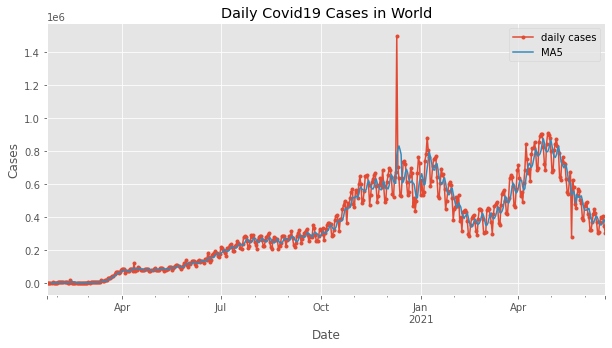

In [11]:
df.Cases.plot(title="Daily Covid19 Cases in World",marker=".",figsize=(10,5),label="daily cases")
df.Cases.rolling(window=5).mean().plot(figsize=(10,5),label="MA5")
plt.ylabel("Cases")
plt.legend()
plt.show()

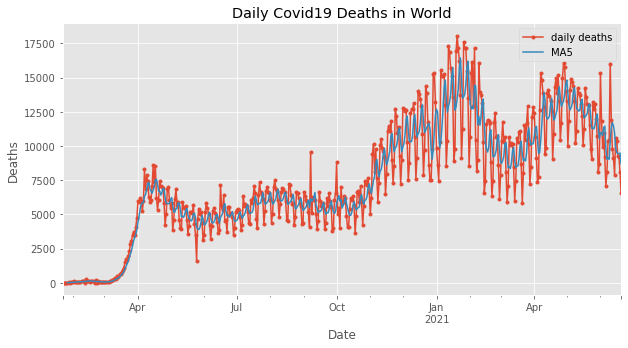

In [12]:
df.Deaths.plot(title="Daily Covid19 Deaths in World",marker=".",figsize=(10,5),label="daily deaths")
df.Deaths.rolling(window=5).mean().plot(figsize=(10,5),label="MA5")
plt.ylabel("Deaths")
plt.legend()
plt.show()

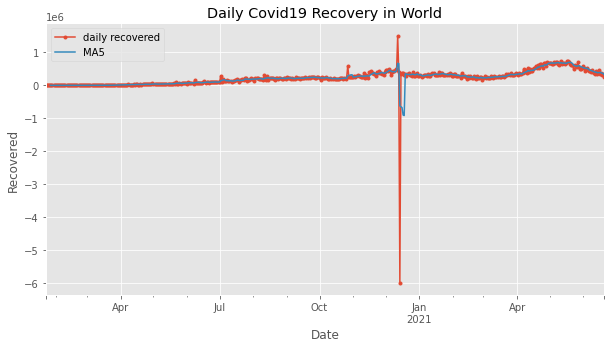

In [13]:
df.Recovered.plot(title="Daily Covid19 Recovery in World",marker=".",figsize=(10,5),label="daily recovered")
df.Recovered.rolling(window=5).mean().plot(figsize=(10,5),label="MA5")
plt.ylabel("Recovered")
plt.legend()
plt.show()

# Covid-19 Cases Prediction with Python for Next 10 Days
Now, I will use the Facebook prophet model for the task of Covid-19 cases prediction with Python for the next 10 days. Facebook prophet model uses time series method for forecasting. 

Let’s see how we can use the Facebook prophet model for Covid-19 cases prediction with Python for the next 10 days:

In [14]:
from fbprophet import Prophet
from sklearn.metrics import r2_score

In [15]:
class Fbprophet(object):
    def fit(self,data):
        
        self.data  = data
        self.model = Prophet(weekly_seasonality=True,daily_seasonality=False,yearly_seasonality=False)
        self.model.fit(self.data)
    
    def forecast(self,periods,freq):
        
        self.future = self.model.make_future_dataframe(periods=periods,freq=freq)
        self.df_forecast = self.model.predict(self.future)
        
    def plot(self,xlabel="Years",ylabel="Values"):
        
        self.model.plot(self.df_forecast,xlabel=xlabel,ylabel=ylabel,figsize=(9,4))
        self.model.plot_components(self.df_forecast,figsize=(9,6))
        
    def R2(self):
        return r2_score(self.data.y, self.df_forecast.yhat[:len(df)])

In [16]:
df_fb  = pd.DataFrame({"ds":[],"y":[]})
df_fb["ds"] = pd.to_datetime(df.index)
df_fb["y"]  = df.iloc[:,0].values
df_fb.head()

,ds,y
0,2020-01-23,98.0
1,2020-01-24,286.0
2,2020-01-25,492.0
3,2020-01-26,685.0
4,2020-01-27,809.0


In [17]:
model = Fbprophet()
model.fit(df_fb)
model.forecast(10,"D")

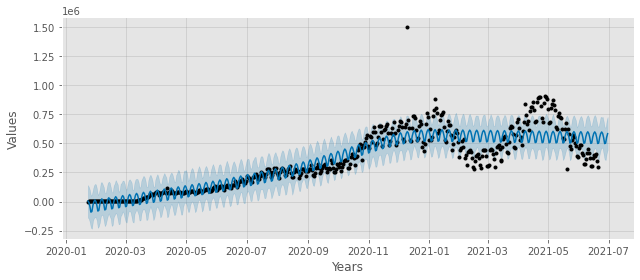

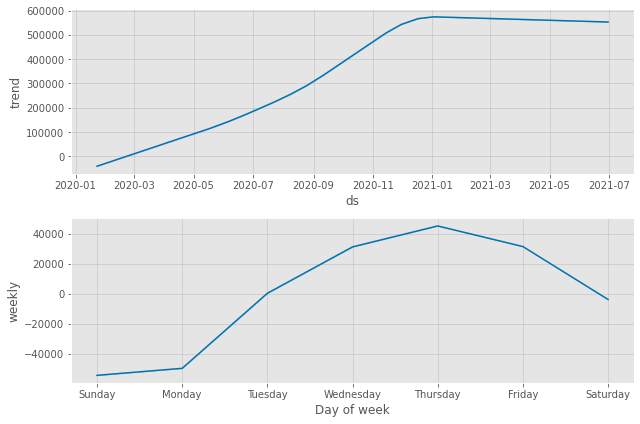

In [18]:
model.plot()

In [19]:
model.R2()

0.8093606096075587

In [20]:
forecast = model.df_forecast[["ds","yhat_lower","yhat_upper","yhat"]].tail(10).reset_index().set_index("ds").drop("index",axis=1)
forecast.head(11)

,yhat_lower,yhat_upper,yhat
ds,,,
2021-06-21,361748.662540,644378.415781,503958.944486
2021-06-22,410504.277271,686585.635542,553957.325005
2021-06-23,445785.462328,729290.868851,584814.330710
2021-06-24,464672.764898,722595.490502,598686.604988
2021-06-25,458333.398097,728334.962608,584811.410973
2021-06-26,409498.131213,689115.829594,549346.896062
2021-06-27,362916.922098,639722.093389,498557.125833
2021-06-28,357600.730850,636349.138110,503123.805992
2021-06-29,413919.050659,693999.414678,553122.186510


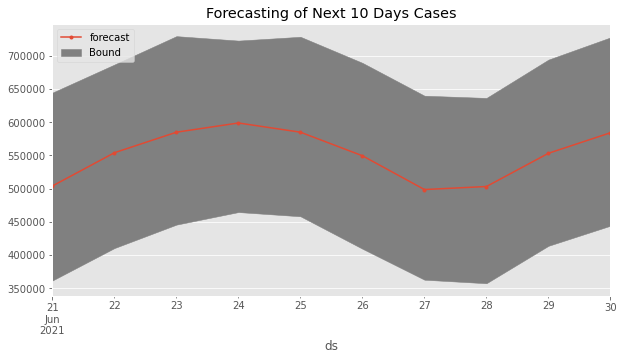

In [21]:
forecast["yhat"].plot(marker=".",figsize=(10,5))
plt.fill_between(x=forecast.index, y1=forecast["yhat_lower"], y2=forecast["yhat_upper"],color="gray")
plt.legend(["forecast","Bound"],loc="upper left")
plt.title("Forecasting of Next 10 Days Cases")
plt.show()